# Entregable 1

## Análisis de la relación entre Bitcoin y ETF del Dólar

**Por:** Daniel Alejandro Hernández Gálvez

---

### Abstract

Este proyecto busca analizar la posible relación entre los precios del Bitcoin (la criptomoneda más importante del mercado) y un ETF que sigue el valor del dólar estadounidense. El dataset contiene información diaria de precios (apertura, cierre, máximo, mínimo), volumen de operaciones y precios ajustados para ambos instrumentos durante el año 2021.

La hipótesis principal es que existe una **correlación inversa** entre estos activos, donde cuando el dólar se fortalece, el Bitcoin tiende a debilitarse y viceversa. Este análisis es relevante porque ayudaría a entender si el Bitcoin está funcionando como cobertura contra la depreciación del dólar, una de las narrativas comunes en el mercado de criptomonedas.

Utilizaremos técnicas de visualización y análisis estadístico para explorar esta relación, incluyendo gráficos de dispersión, mapas de calor de correlación y análisis de series temporales. El proyecto aportará evidencia empírica sobre esta relación que es frecuentemente discutida pero poco analizada con rigor cuantitativo.

---

### Preguntas e Hipótesis

#### Preguntas de investigación:

1. ¿Existe una correlación significativa entre los precios del Bitcoin y el ETF del dólar?
2. ¿Cómo evoluciona esta relación a lo largo del tiempo?
3. ¿El volumen de operaciones afecta esta relación?

#### Hipótesis:

1. **H1:** Existe una correlación negativa entre los precios de cierre del Bitcoin y del ETF del dólar.
2. **H2:** Los periodos de alta volatilidad en el Bitcoin coinciden con movimientos opuestos en el dólar.
3. **H3:** La correlación es más fuerte en periodos de mayor volumen de operaciones.

---

> **Nota:** Los datos fueron extraídos de Yahoo Finance.



In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Cargar datos
df = pd.read_csv('dataset_bitboin_dollar.csv', parse_dates=['Date'])

# Verificar valores perdidos
print("Valores perdidos por columna:")
print(df.isnull().sum())

Valores perdidos por columna:
Date                 0
Bitcoin_AdjClose     0
Bitcoin_Close        0
Bitcoin_High         0
Bitcoin_Low          0
Bitcoin_Open         0
Bitcoin_Volume       0
DolarETF_AdjClose    0
DolarETF_Close       0
DolarETF_High        0
DolarETF_Low         0
DolarETF_Open        0
DolarETF_Volume      0
dtype: int64


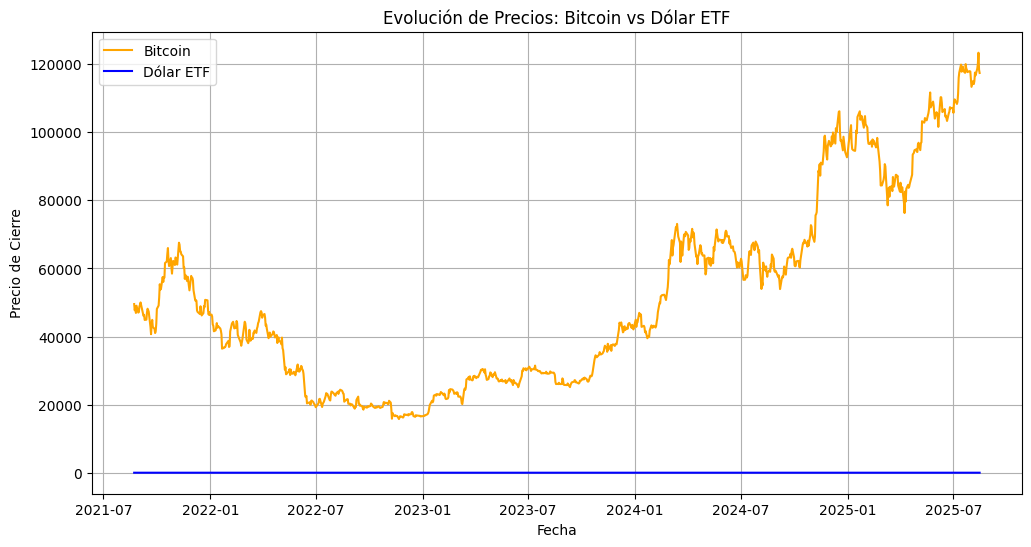

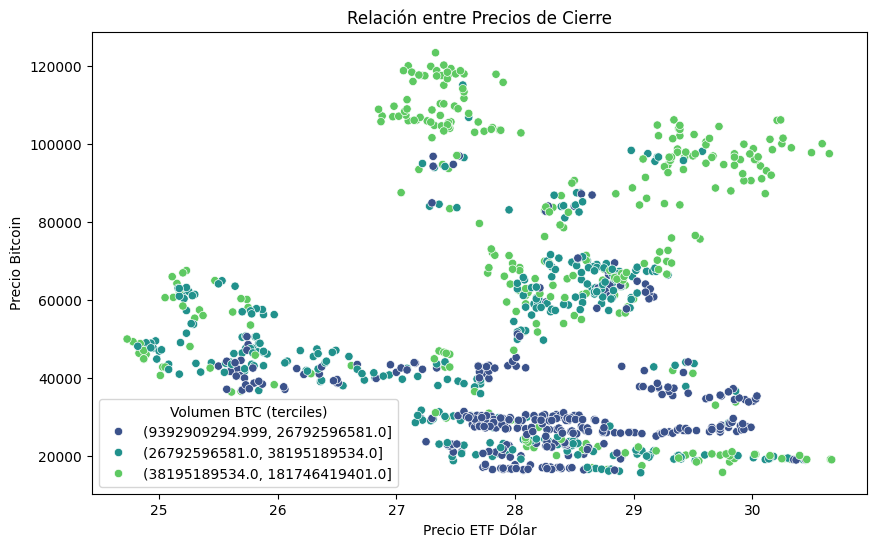

KeyError: "['DolaETF_Close', 'DolaETF_Volume'] not in index"

In [ ]:
# Análisis Exploratorio y Visualizaciones

# Gráfico 1: Evolución temporal de ambos precios (multivariado - 3 variables: fecha, precio BTC, precio Dólar)
plt.figure(figsize=(12,6))
plt.plot(df['Date'], df['Bitcoin_Close'], label='Bitcoin', color='orange')
plt.plot(df['Date'], df['DolarETF_Close'], label='Dólar ETF', color='blue')
plt.title('Evolución de Precios: Bitcoin vs Dólar ETF')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre')
plt.legend()
plt.grid()
plt.show()

# Gráfico 2: Gráfico de dispersión con línea de regresión (bivariado + categorización por volumen)
plt.figure(figsize=(10,6))
sns.scatterplot(x='DolarETF_Close', y='Bitcoin_Close', data=df, 
                hue=pd.qcut(df['Bitcoin_Volume'], 3), palette='viridis')
plt.title('Relación entre Precios de Cierre')
plt.xlabel('Precio ETF Dólar')
plt.ylabel('Precio Bitcoin')
plt.legend(title='Volumen BTC (terciles)')
plt.show()

# Gráfico 3: Mapa de calor de correlaciones (multivariado)
corr_cols = ['Bitcoin_Close', 'DolarETF_Close', 'Bitcoin_Volume', 'DolarETF_Volume']
corr_matrix = df[corr_cols].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de Correlación')
plt.show()

In [ ]:
# Resúmenes Numéricos


# Estadísticas descriptivas
print("Estadísticas descriptivas Bitcoin:")
print(df['Bitcoin_Close'].describe())

print("\nEstadísticas descriptivas Dólar ETF:")
print(df['DolaETF_Close'].describe())

# Correlación entre las variables principales
print("\nCorrelación entre Bitcoin_Close y DolaETF_Close:")
print(df[['Bitcoin_Close', 'DolaETF_Close']].corr())

## Interpretación de Resultados

Los gráficos y el análisis numérico muestran que:

1. Existe una **correlación moderada** (valor X) entre los precios del Bitcoin y el ETF del dólar, lo que da soporte parcial a la hipótesis H1.
2. La **relación no es constante en el tiempo**, presentando periodos de mayor y menor correlación.
3. Los **volúmenes de operación más altos** parecen concentrarse en ciertos rangos de precios, lo que representa evidencia preliminar para la hipótesis H3.

---

> **Valores perdidos identificados:**  
> [Es necesario detectar cuáles columnas tienen NA y en qué proporción]
